## Generating matrix 
The matrix is under setting only including number of elements 0 and 1.
If n is even, then the number of 0 and 1 are the same.
If n is odd, then one number of the 0 and 1 are $\lfloor{(n \times n)}/2 \rfloor$ and the other one is $\lfloor{(n \times n)}/2 \rfloor$ +1

### Simulating the game with strategy 
- Aim to use this to investigate 2x2 case.


In [58]:
import numpy as np
import random

def initialize_grid(n):
    return np.full((n, n), -1)  # Initialize an n x n grid with -1

def find_strategic_move(grid, player, strategy):
    available_moves = np.argwhere(grid == -1)
    if strategy == "follow":
        # Find a move that shares a row or column with an existing move
        player_moves = np.argwhere(grid == player)
        for move in available_moves:
            if any((move[0] == pm[0] or move[1] == pm[1]) for pm in player_moves):
    elif strategy == "avoid":
        # Find a move that doesn't share a row or column with the opponent's moves
        opponent_moves = np.argwhere(grid == (1 - player))
        for move in available_moves:
            if all(move[0] != om[0] and move[1] != om[1] for om in opponent_moves):
                return move
    # If no strategic move is found or needed, return None
    return None

def random_move(grid):
    available_moves = np.argwhere(grid == -1)
    return available_moves[random.randint(0, len(available_moves) - 1)]

def play_game(n, my_strategy, friend_strategy, I_start=True):
    grid = initialize_grid(n)
    player = 0 if I_start else 1  # Determine who starts based on I_start

    while -1 in grid:
        if player == 0:  # My turn
            move = find_strategic_move(grid, player, my_strategy)
            if move is None:
                move = random_move(grid)
            grid[move[0], move[1]] = player
        else:  # Friend's turn (random move)
            move = random_move(grid)
            grid[move[0], move[1]] = player

        player = 1 - player  # Switch turns

    determinant = np.linalg.det(grid)
    win = determinant == 0
    return win, determinant





In [59]:
# Adjusting the simulation to focus on 2x2 matrix and separating the cases where the user starts versus when the friend starts.

def simulate_games(n, iterations, I_start):
    wins = 0
    for _ in range(iterations):
        my_strategy = "follow" if I_start else "avoid"
        friend_strategy = "random"
        win, _ = play_game(n, my_strategy, friend_strategy, I_start)
        if win:
            wins += 1
    return wins / iterations

# Parameters
n = 2  # Grid size for 2x2 matrix
iterations = 1000  # Number of games to simulate

# Simulate games for both scenarios
win_rate_I_start = simulate_games(n, iterations, True)  # Case where I go first
win_rate_friend_starts = simulate_games(n, iterations, False)  # Case where the friend goes first

win_rate_I_start, win_rate_friend_starts


(1.0, 1.0)

So in this case, I have found out a 100% winning strategy in 2x2 no matter who starts

## Investigate 3x3 case

In [30]:
import numpy as np
from itertools import combinations

def generate_all_matrices_with_det_0(n):
    # Determine the number of 0s and 1s
    total_elements = n * n
    # Adjusting for both cases: four 1s (five 0s) and five 1s (four 0s)
    winning_matrices = []
    for num_ones in [4, 5]:
        # Generate all unique combinations of positions for the ones
        positions = range(total_elements)
        ones_positions = list(combinations(positions, num_ones))
        
        # For each combination, generate a matrix and check its determinant
        for pos in ones_positions:
            matrix = np.zeros(total_elements, dtype=int)
            matrix[list(pos)] = 1
            if np.isclose(np.linalg.det(matrix.reshape(n, n)), 0, atol=1e-10):
                winning_matrices.append(matrix.reshape(n, n))
                
    return winning_matrices

# Example usage
n = 3
winning_matrices = generate_all_matrices_with_det_0(n)

# Due to the potentially large number of matrices, we'll output the count



144

In [62]:
# Adjusting the simulation to focus on 2x2 matrix and separating the cases where the user starts versus when the friend starts.

def simulate_games(n, iterations, I_start):
    wins = 0
    for _ in range(iterations):
        my_strategy = "follow" if I_start else "avoid"
        friend_strategy = "random"
        win, _ = play_game(n, my_strategy, friend_strategy, I_start)
        if win:
            wins += 1
    return wins / iterations

# Parameters
n = 5  # Grid size for 2x2 matrix
iterations = 1000  # Number of games to simulate

# Simulate games for both scenarios
win_rate_I_start = simulate_games(n, iterations, True)  # Case where I go first
win_rate_friend_starts = simulate_games(n, iterations, False)  # Case where the friend goes first

win_rate_I_start, win_rate_friend_starts

(0.805, 0.688)

In [73]:
I_start = []
friend_start = []
for i in range(2,10):
    I_start.append(simulate_games(i, 1000, True))
    friend_start.append(simulate_games(i,1000,False))
    

print(I_start)
print(friend_start)

[1.0, 0.854, 0.795, 0.815, 0.858, 0.873, 0.883, 0.871]
[1.0, 0.651, 0.73, 0.681, 0.688, 0.642, 0.563, 0.492]


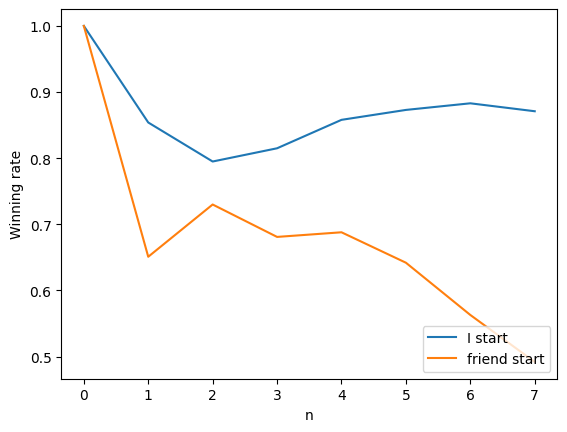

In [76]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(2,10)
ypoints = np.array([3, 8, 1, 10])

plt.plot(I_start)
plt.plot(friend_start)
plt.xlabel("n")
plt.ylabel("Winning rate")
plt.legend(["I start", "friend start"], loc="lower right")
plt.show()